In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np

import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
PATH="C:\\Users\\Hp\\.keras\\datasets\\cats_and_dogs_filtered"

In [18]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [19]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [20]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [21]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [22]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [23]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)


In [25]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
sample_training_images, _ = next(train_data_gen)

In [28]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

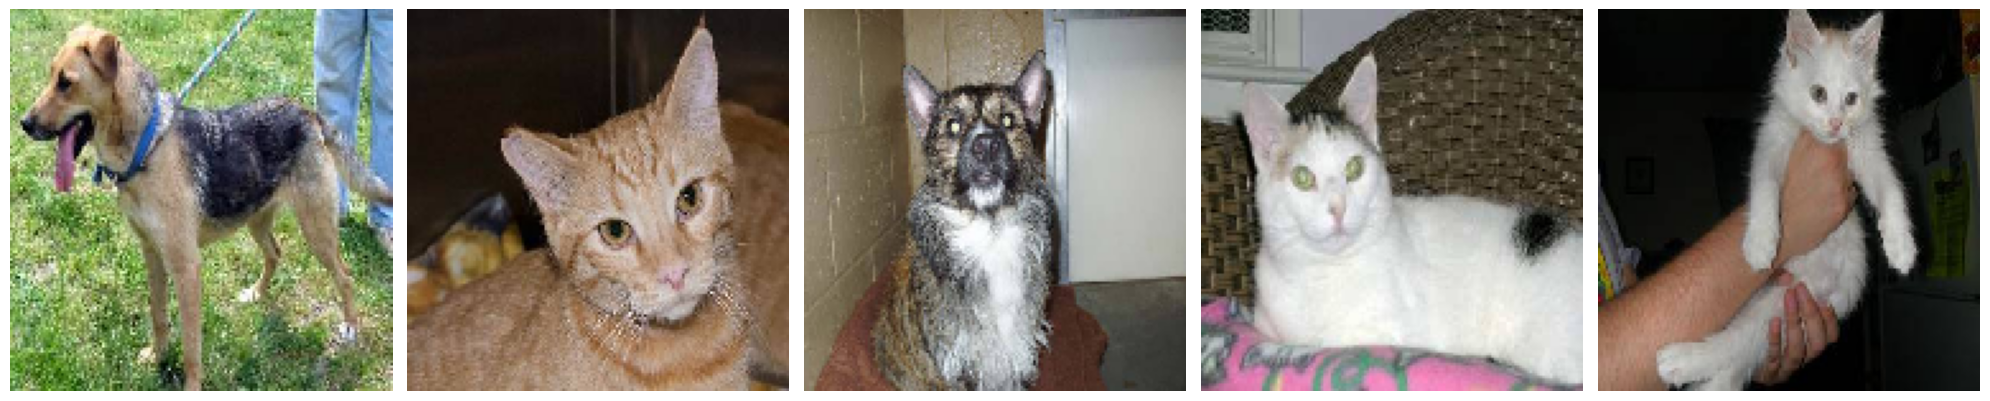

In [29]:
plotImages(sample_training_images[:5])

In [30]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [35]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('model.h5')

<ipython-input-35-8f4a098e3013>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
15/15 [==============================] - 69s 5s/step - loss: 0.5438 - accuracy: 0.7009 - val_loss: 0.5712 - val_accuracy: 0.6920
Epoch 2/5
15/15 [==============================] - 59s 4s/step - loss: 0.5114 - accuracy: 0.7385 - val_loss: 0.5618 - val_accuracy: 0.6931
Epoch 3/5
15/15 [==============================] - 61s 4s/step - loss: 0.4615 - accuracy: 0.7682 - val_loss: 0.5480 - val_accuracy: 0.7310
Epoch 4/5
15/15 [==============================] - 68s 5s/step - loss: 0.4335 - accuracy: 0.7981 - val_loss: 0.5821 - val_accuracy: 0.6730
Epoch 5/5
15/15 [==============================] - 57s 4s/step - loss: 0.3820 - accuracy: 0.8162 - val_loss: 0.5260 - val_accuracy: 0.7500


In [36]:
!pip install pydot

In [37]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2


model = tf.keras.models.load_model('model.h5')

full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

frozen_func = convert_variables_to_constants_v2(full_model)

input_node_name = full_model.inputs[0].name.split(':')[0]
output_node_name = frozen_func.outputs[0].name.split(':')[0]
print("Input node name:", input_node_name)
print("Output node name:", output_node_name)


graph_def = frozen_func.graph.as_graph_def()
graph_def = tf.compat.v1.graph_util.remove_training_nodes(graph_def)
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])


tf.io.write_graph(graph_def, '.', 'model.xml', as_text=True)

Input node name: x
Output node name: Identity


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


'./model.xml'

In [38]:
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])

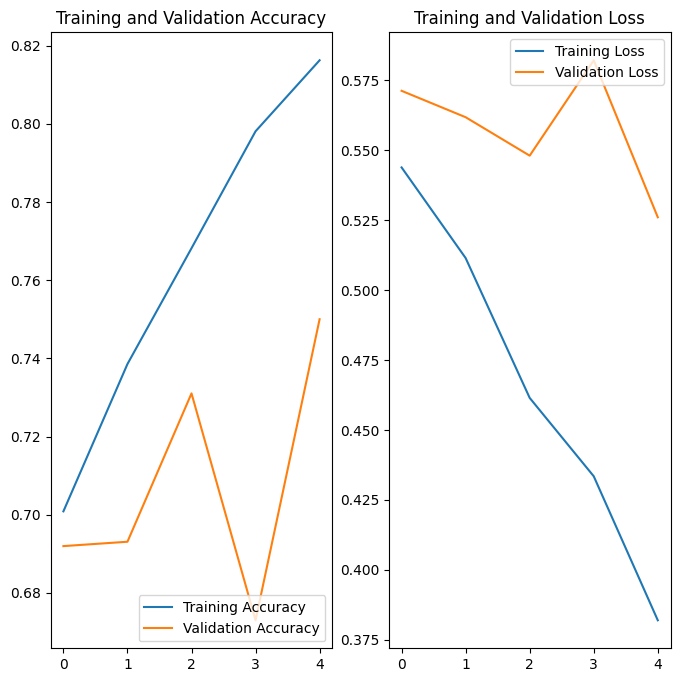

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
test_image_path = 'dog.jpeg'


In [54]:
img = image.load_img(test_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [55]:
img_array = img_array / 255.0

In [56]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 54ms/step


In [57]:
if prediction[0][0] >= 0.5:
    print("The image contains a dog.")
else:
    print("The image contains a cat.")

The image contains a dog.
